In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [5]:
df = pd.read_csv(r"C:\Users\nitin\Downloads\hotel_bookings 2.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  str    
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  str    
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal                       

In [7]:
# parse dates with day-first format and coerce unparsable values to NaT
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], dayfirst=True, errors='coerce')

In [8]:
df.info()
df.columns

<class 'pandas.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  str           
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  str           
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64       
 11

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='str')

In [9]:
for col in df.select_dtypes(include= 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
<StringArray>
['Resort Hotel', 'City Hotel']
Length: 2, dtype: str
--------------------------------------------------
arrival_date_month
<StringArray>
[     'July',    'August', 'September',   'October',  'November',  'December',
   'January',  'February',     'March',     'April',       'May',      'June']
Length: 12, dtype: str
--------------------------------------------------
meal
<StringArray>
['BB', 'FB', 'HB', 'SC', 'Undefined']
Length: 5, dtype: str
--------------------------------------------------
country
<StringArray>
['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA',   nan, 'ROU', 'NOR', 'OMN',
 ...
 'ATA', 'GTM', 'ASM', 'MRT', 'NCL', 'KIR', 'SDN', 'ATF', 'SLE', 'LAO']
Length: 178, dtype: str
--------------------------------------------------
market_segment
<StringArray>
[       'Direct',     'Corporate',     'Online TA', 'Offline TA/TO',
 'Complementary',        'Groups',     'Undefined',      'Aviation']
Length: 8, dtype: str
------------------------------------------------

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
df.drop(['company', 'agent'], axis = 1, inplace = True)
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [12]:
df.dropna(inplace= True)

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [14]:
df = df[df['adr']<5000]

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


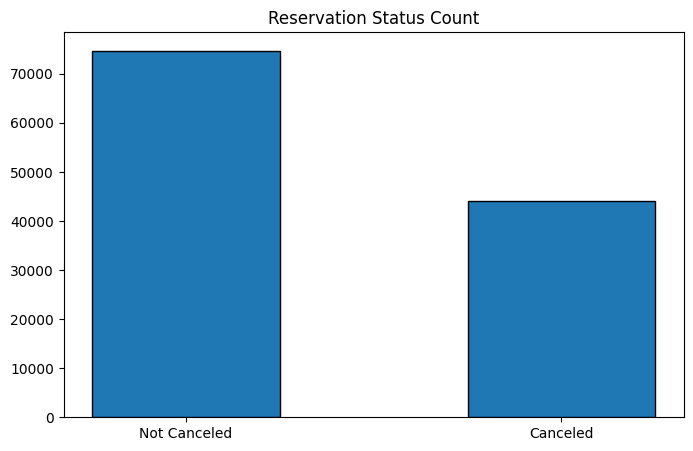

In [15]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize=(8,5))
plt.title('Reservation Status Count')
plt.bar(['Not Canceled', "Canceled"],df['is_canceled'].value_counts(),edgecolor = 'black', width= 0.5)
plt.show()

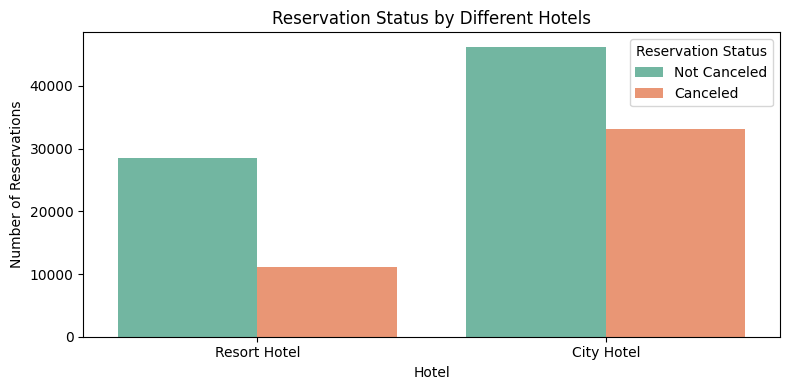

In [16]:
plt.figure(figsize=(8,4))

ax = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Set2')

ax.set_title('Reservation Status by Different Hotels')
ax.set_xlabel('Hotel')
ax.set_ylabel('Number of Reservations')

ax.legend(title='Reservation Status',
          labels=['Not Canceled', 'Canceled'],
          bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

In [17]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)


is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [18]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)


is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [19]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

In [20]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df.info()

<class 'pandas.DataFrame'>
Index: 118897 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118897 non-null  str           
 1   is_canceled                     118897 non-null  int64         
 2   lead_time                       118897 non-null  int64         
 3   arrival_date_year               118897 non-null  int64         
 4   arrival_date_month              118897 non-null  str           
 5   arrival_date_week_number        118897 non-null  int64         
 6   arrival_date_day_of_month       118897 non-null  int64         
 7   stays_in_weekend_nights         118897 non-null  int64         
 8   stays_in_week_nights            118897 non-null  int64         
 9   adults                          118897 non-null  int64         
 10  children                        118897 non-null  float64       
 11  bab

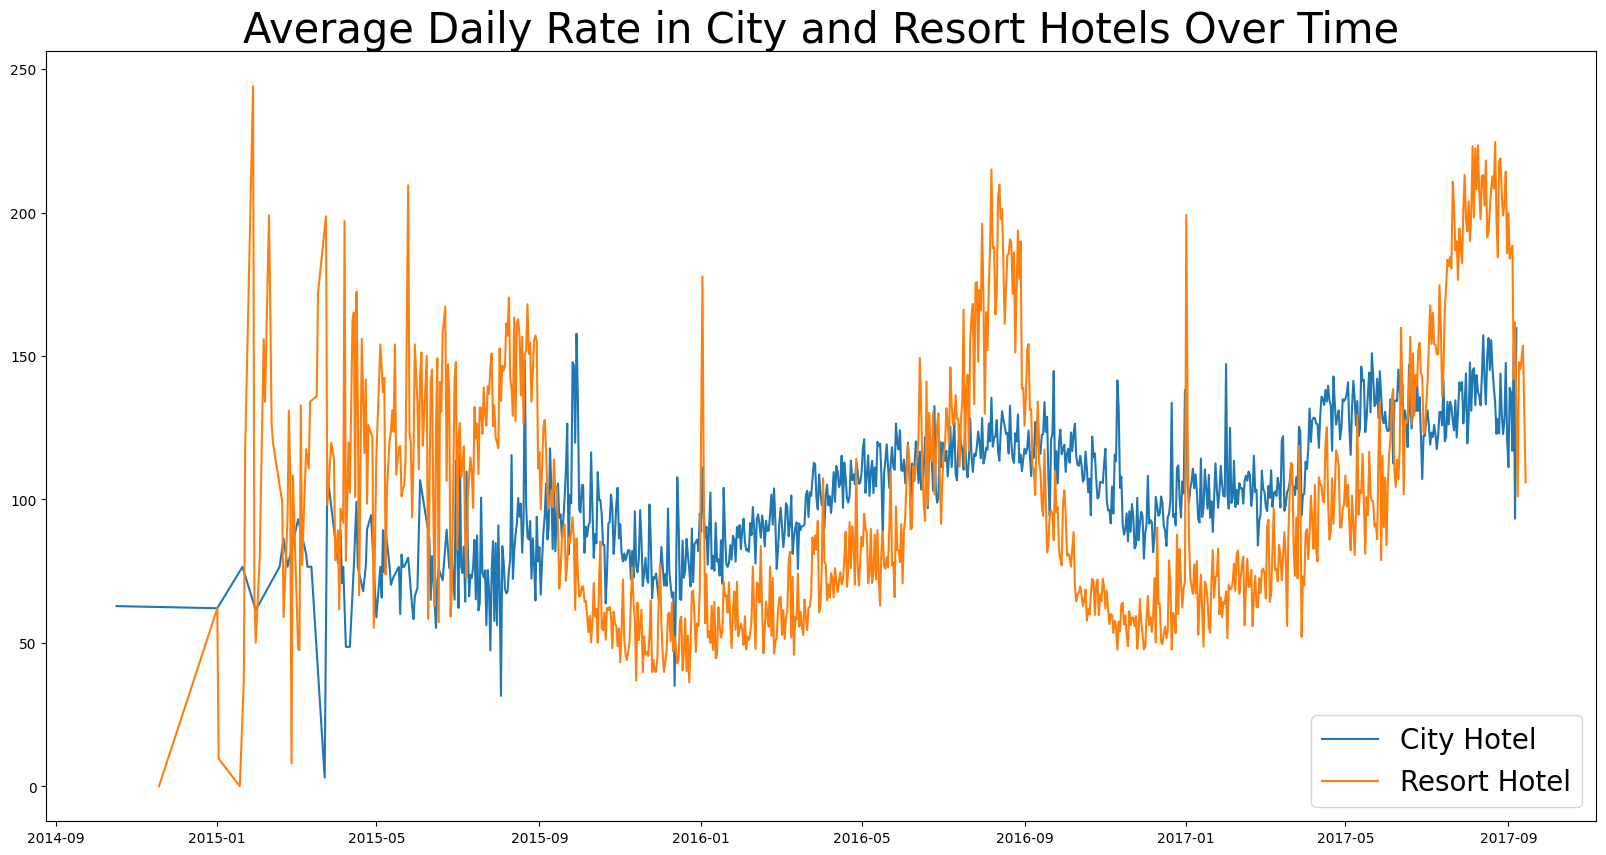

In [21]:
plt.figure(figsize = (20,10))
plt.title ('Average Daily Rate in City and Resort Hotels Over Time', fontsize = 30)
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.plot(resort_hotel.index, resort_hotel['adr'],label ="Resort Hotel")
plt.legend(fontsize = 20)
plt.show()

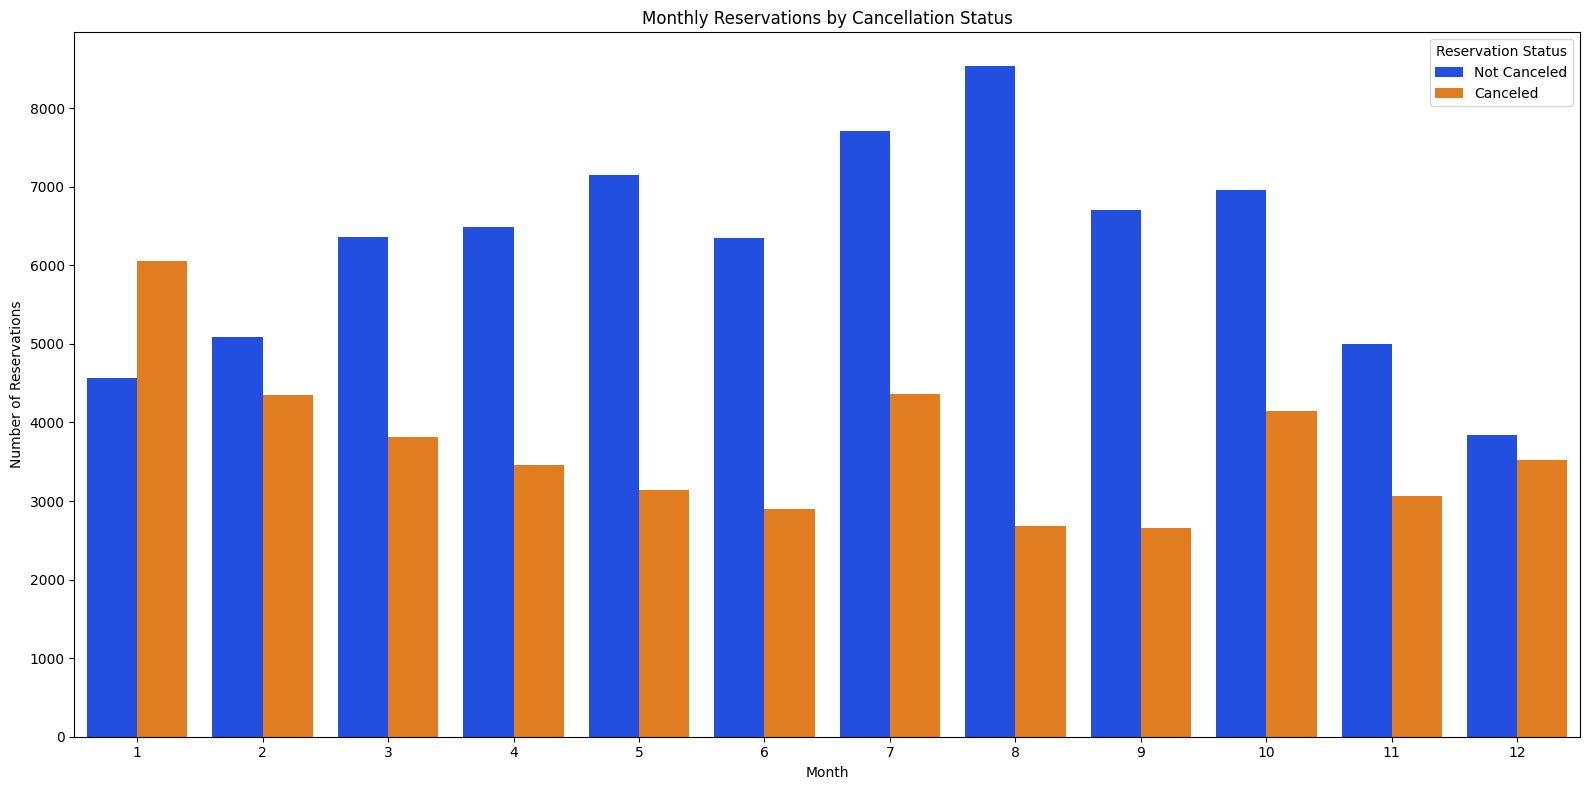

In [22]:
df['month'] = df['reservation_status_date'].dt.month

plt.figure(figsize=(16,8))

ax = sns.countplot(
    x='month',
    data=df,
    hue='is_canceled',
    palette='bright'
)

ax.set_xlabel('Month')
ax.set_ylabel('Number of Reservations')
ax.set_title('Monthly Reservations by Cancellation Status')

ax.legend(
    title='Reservation Status',
    labels=['Not Canceled', 'Canceled'],
    bbox_to_anchor=(1,1)
)

plt.tight_layout()
plt.show()


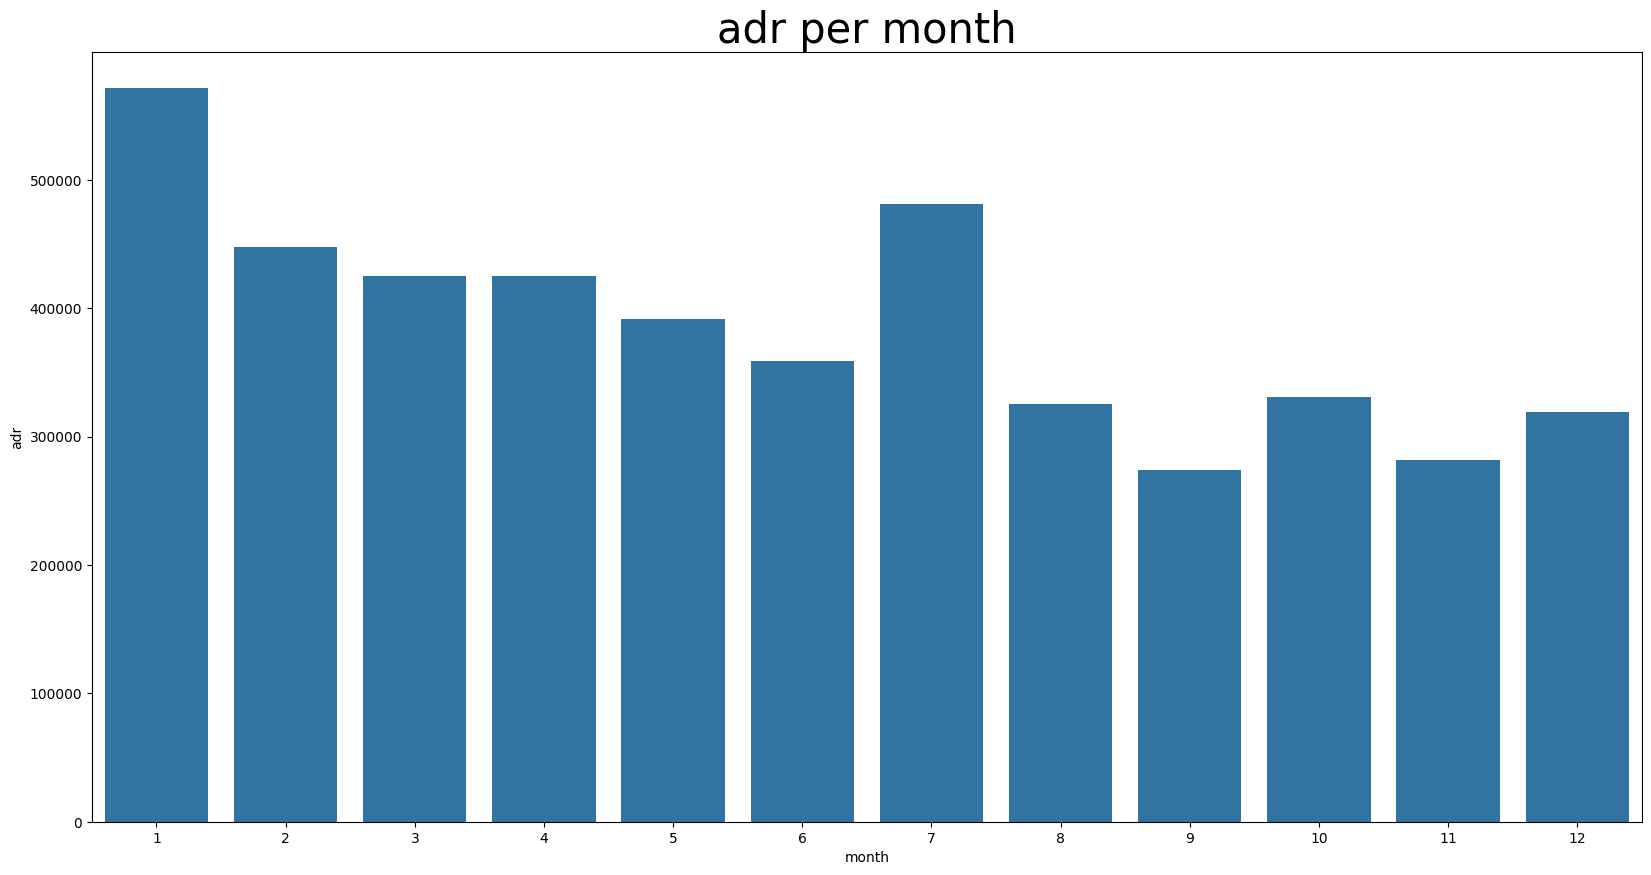

In [23]:
plt.figure(figsize = (20,10))
plt.title('adr per month',fontsize = 30)
sns.barplot(
    x='month',
    y='adr',
    data=df[df['is_canceled'] == 1]
            .groupby('month')[['adr']]
            .sum()
            .reset_index()
)
plt.show()

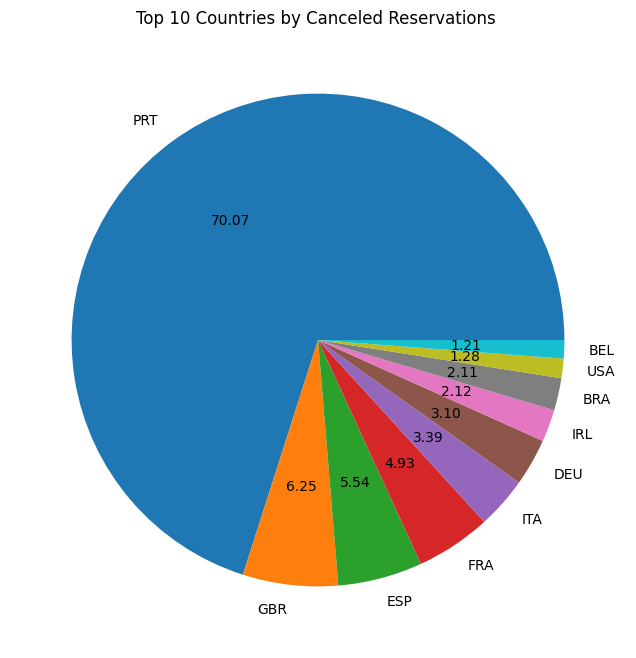

In [24]:
cancelled_data = df[df['is_canceled']== 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 Countries by Canceled Reservations ')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

In [25]:
df['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [26]:
cancelled_data['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

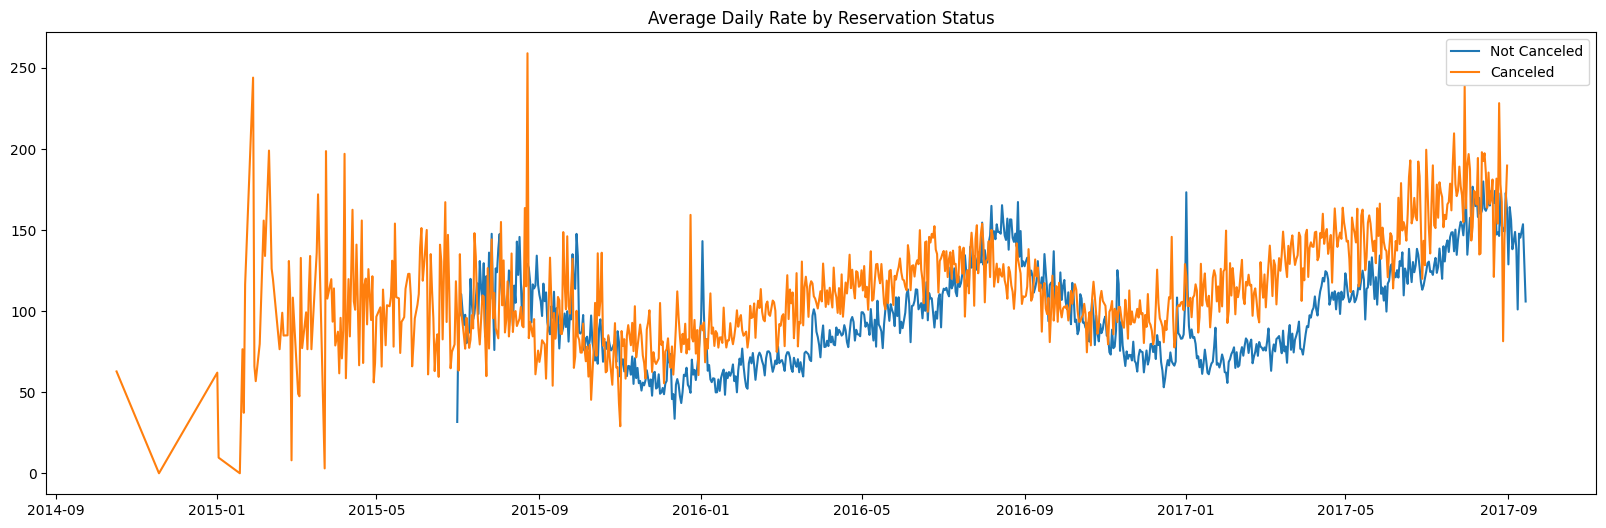

In [27]:
# Cancelled ADR
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr = cancelled_df_adr.reset_index()
cancelled_df_adr = cancelled_df_adr.sort_values('reservation_status_date')

# Not Cancelled ADR
not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr = not_cancelled_df_adr.reset_index()
not_cancelled_df_adr = not_cancelled_df_adr.sort_values('reservation_status_date')

# Plot
plt.figure(figsize=(20,6))
plt.title('Average Daily Rate by Reservation Status')
plt.plot(not_cancelled_df_adr['reservation_status_date'], 
         not_cancelled_df_adr['adr'], label='Not Canceled')

plt.plot(cancelled_df_adr['reservation_status_date'], 
         cancelled_df_adr['adr'], label='Canceled')

plt.legend()
plt.show()
